## Importing Libraries

In [87]:
# important packages
	
import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis
import seaborn as sns				# Statistical data visualization
import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

## Loading Dataset

In [88]:
df = pd.read_excel("Absenteeism_pre_processed.xlsx")
df

,Health Diaseases,Child Birth and Pregnancy,External Factors,Light Conditions,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172,30,4
1,0,0,0,0,7,3,1,118,13,18,50,239.554,97,1,0,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,0,0,1,0,0,89,170,31,2
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,0,2,1,1,0,68,168,24,4
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1,0,0,0,7,3,1,289,36,13,33,264.604,93,0,0,2,1,0,1,90,172,30,8
736,1,0,0,0,7,3,1,235,11,14,37,264.604,93,0,1,1,0,0,1,88,172,29,4
737,0,0,0,0,0,3,1,118,14,13,40,271.219,95,0,0,1,1,0,8,98,170,34,0
738,0,0,0,0,0,4,2,231,35,14,39,271.219,95,0,0,2,1,0,2,100,170,35,0


<AxesSubplot: xlabel='Absenteeism time in hours'>

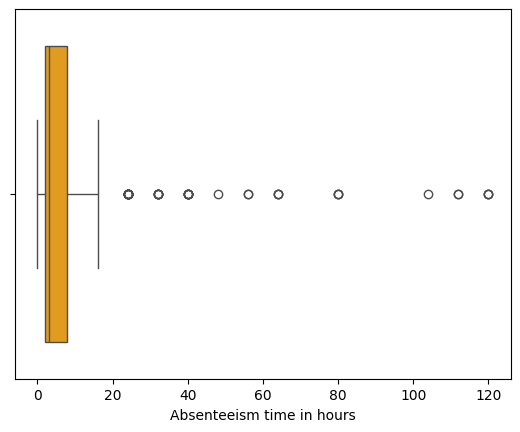

In [89]:
sns.boxplot(df["Absenteeism time in hours"], orient ="h", color = "orange", legend ="full")

In [90]:
df["Absenteeism time in hours"].describe()

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

In [91]:
(8-2)*1.5 + 8

17.0

In [92]:
df1 = df.copy()
df1.shape

(740, 23)

In [93]:
df1 = df1[df1["Absenteeism time in hours"] <= 17]

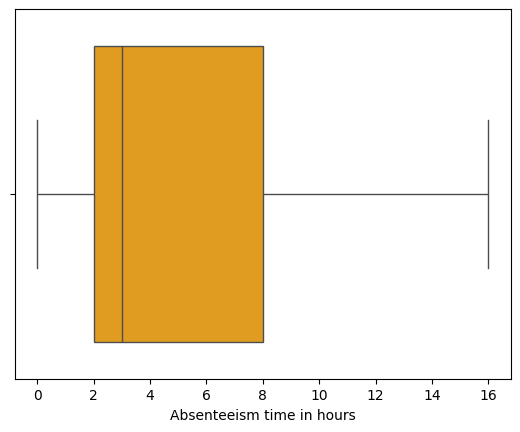

In [94]:
sns.boxplot(df1["Absenteeism time in hours"], orient ="h", color = "orange")
plt.show()

## Defining X and y

In [95]:
X = df1.iloc[:, :-1]
X.shape

(696, 22)

In [96]:
y = df1.iloc[:,-1]
y

0      4
1      0
2      2
3      4
4      2
      ..
735    8
736    4
737    0
738    0
739    0
Name: Absenteeism time in hours, Length: 696, dtype: int64

## Scaling

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

In [98]:
scaler_X = StandardScaler

In [99]:
import numpy as np
import pandas as pd

class CustomScaler(BaseEstimator, TransformerMixin):

    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy=copy, with_mean=with_mean, with_std=with_std)
        self.columns = columns
        self.copy = copy
        self.with_mean = with_mean
        self.with_std = with_std

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns

        # Apply the scaler transform only to the specified columns and ensure the index is preserved
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns, index=X.index)

        # Extract the not scaled data by dropping the scaled columns
        X_not_scaled = X.drop(columns=self.columns)

        # Concatenate the scaled and not scaled data, ensuring the original column order is preserved
        X_transformed = pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

        return X_transformed

In [100]:
X.columns.values

array(['Health Diaseases', 'Child Birth and Pregnancy',
       'External Factors', 'Light Conditions', 'Month of absence',
       'Day of the week', 'Seasons', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index'], dtype=object)

In [101]:
# choose the columns to scale
# we later augmented this code and put it in comments
# columns_to_scale = ['Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
       #'Work load Average/day ', 'Hit target', 'Son', 'Pet', 'Weight', 'Height', 'Body mass index']
    
# select the columns to omit
columns_to_omit = ['Health Diaseases',
 'Child Birth and Pregnancy',
 'External Factors',
 'Light Conditions', 'Disciplinary failure',
       'Education', 'Social drinker', 'Social smoker']

# create the columns to scale, based on the columns to omit
# use list comprehension to iterate over the list
columns_to_scale = [x for x in X.columns.values if x not in columns_to_omit]
columns_to_scale

['Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Son',
 'Pet',
 'Weight',
 'Height',
 'Body mass index']

In [102]:
# declare a scaler object, specifying the columns you want to scale
scaler_X = CustomScaler(columns_to_scale)

In [103]:
# fit the data (calculate mean and standard deviation); they are automatically stored inside the object 
scaler_X.fit(X)

CustomScaler(columns=['Month of absence', 'Day of the week', 'Seasons',
                      'Transportation expense',
                      'Distance from Residence to Work', 'Service time', 'Age',
                      'Work load Average/day ', 'Hit target', 'Son', 'Pet',
                      'Weight', 'Height', 'Body mass index'])

In [104]:
X.shape

(696, 22)

In [105]:
X = scaler_X.transform(X)
X.head(10)

,Health Diaseases,Child Birth and Pregnancy,External Factors,Light Conditions,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0,0,0,1,0.200204,-0.674792,-1.376307,1.018520,0.411865,0.113295,-0.523188,-0.809487,0.64209,0,0,0.909815,1,0,0.173385,0.860948,0.019950,0.759603
1,0,0,0,0,0.200204,-0.674792,-1.376307,-1.558056,-1.136183,1.242994,2.124529,-0.809487,0.64209,1,0,-0.002622,1,0,-0.571527,1.482626,1.074519,0.990570
2,0,0,0,1,0.200204,0.029339,-1.376307,-0.638927,1.421462,1.242994,0.255552,-0.809487,0.64209,0,0,-0.915059,1,0,-0.571527,0.783238,-0.331573,0.990570
3,1,0,0,0,0.200204,0.733469,-1.376307,0.867843,-1.674634,0.339235,0.411300,-0.809487,0.64209,0,0,0.909815,1,1,-0.571527,-0.848666,-0.683096,-0.626200
4,0,0,0,1,0.200204,0.733469,-1.376307,1.018520,0.411865,0.113295,-0.523188,-0.809487,0.64209,0,0,0.909815,1,0,0.173385,0.860948,0.019950,0.759603
5,0,0,0,1,0.200204,1.437600,-1.376307,-0.638927,1.421462,1.242994,0.255552,-0.809487,0.64209,0,0,-0.915059,1,0,-0.571527,0.783238,-0.331573,0.990570
6,0,0,0,1,0.200204,1.437600,-1.376307,2.103394,1.488768,-2.146105,-1.301929,-0.809487,0.64209,0,0,-0.002622,1,0,2.408121,0.083851,0.019950,0.066702
7,0,0,0,1,0.200204,1.437600,-1.376307,0.581557,1.354155,-0.338585,-0.055944,-0.809487,0.64209,0,0,2.734690,1,0,-0.571527,-1.081795,-0.683096,-0.857167
9,0,0,0,1,0.200204,-1.378923,-1.376307,0.204864,-1.270796,0.339235,0.099804,-0.809487,0.64209,0,1,-0.002622,0,0,0.173385,0.705528,0.019950,0.528636
10,1,0,0,0,0.200204,-1.378923,-1.376307,0.581557,1.354155,-0.338585,-0.055944,-0.809487,0.64209,0,0,2.734690,1,0,-0.571527,-1.081795,-0.683096,-0.857167


In [106]:
X.shape

(696, 22)

## Train and Test Splitting

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 50)

In [108]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(556, 22) (556,)
(140, 22) (140,)


## Model Training

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lm = LinearRegression()
lm.fit(X_train,y_train)

# Model's performance on the test set
linreg_score = lm.score(X_test,y_test)

# Logistic Regression

## Feature Engineering

In [111]:
df2 = df.copy()

In [112]:
df2['Absenteeism time in hours'].median()

3.0

Let's divide Absenteeism into two classes

- Moderately Absent [0] <= 3
- Excessively Absent [1] > 3

In [113]:
df.shape

(740, 23)

In [114]:
df2['Absenteeism time in hours'] = df2['Absenteeism time in hours'].apply( lambda x: 1 if x > 3 else 0)
df2.head(15)

,Health Diaseases,Child Birth and Pregnancy,External Factors,Light Conditions,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,0,0,1,7,3,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172,30,1
1,0,0,0,0,7,3,1,118,13,18,50,239.554,97,1,0,1,1,0,0,98,178,31,0
2,0,0,0,1,7,4,1,179,51,18,38,239.554,97,0,0,0,1,0,0,89,170,31,0
3,1,0,0,0,7,5,1,279,5,14,39,239.554,97,0,0,2,1,1,0,68,168,24,1
4,0,0,0,1,7,5,1,289,36,13,33,239.554,97,0,0,2,1,0,1,90,172,30,0
5,0,0,0,1,7,6,1,179,51,18,38,239.554,97,0,0,0,1,0,0,89,170,31,0
6,0,0,0,1,7,6,1,361,52,3,28,239.554,97,0,0,1,1,0,4,80,172,27,1
7,0,0,0,1,7,6,1,260,50,11,36,239.554,97,0,0,4,1,0,0,65,168,23,1
8,0,0,1,0,7,2,1,155,12,14,34,239.554,97,0,0,2,1,0,0,95,196,25,1
9,0,0,0,1,7,2,1,235,11,14,37,239.554,97,0,1,1,0,0,1,88,172,29,1


In [115]:
Moderately_Absent = df2[df2['Absenteeism time in hours'] == 0]
Excessively_Absent = df2[df2['Absenteeism time in hours'] == 1]


print(f'Total Employee count = {len(df2)}')
print(f'Employees who Moderately Absent = {len(Moderately_Absent)/len(df2)*100:.2f}%')
print(f'Employees who Excessively Absent = {len(Excessively_Absent)/len(df2)*100:.2f}%')

Total Employee count = 740
Employees who Moderately Absent = 54.19%
Employees who Excessively Absent = 45.81%


In [116]:
X = df2.iloc[:, :-1]
X.shape

(740, 22)

In [117]:
y = df2.iloc[:,-1]
y

0      1
1      0
2      0
3      1
4      0
      ..
735    1
736    1
737    0
738    0
739    0
Name: Absenteeism time in hours, Length: 740, dtype: int64

In [118]:
# fit the data (calculate mean and standard deviation); they are automatically stored inside the object 
scaler_X.fit(X)

CustomScaler(columns=['Month of absence', 'Day of the week', 'Seasons',
                      'Transportation expense',
                      'Distance from Residence to Work', 'Service time', 'Age',
                      'Work load Average/day ', 'Hit target', 'Son', 'Pet',
                      'Weight', 'Height', 'Body mass index'])

In [119]:
X = scaler_X.transform(X)
X

,Health Diaseases,Child Birth and Pregnancy,External Factors,Light Conditions,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0,0,0,1,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,0,0,0.893723,1,0,0.192850,0.851673,-0.019046,0.775932
1,0,0,0,0,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,1,0,-0.017234,1,0,-0.566240,1.473056,0.975828,1.009438
2,0,0,0,1,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,0,0,-0.928191,1,0,-0.566240,0.774000,-0.350671,1.009438
3,1,0,0,0,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,0,0,0.893723,1,1,-0.566240,-0.857131,-0.682295,-0.625100
4,0,0,0,1,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,0,0,0.893723,1,0,0.192850,0.851673,-0.019046,0.775932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1,0,0,0,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,-0.420423,0,0,0.893723,1,0,0.192850,0.851673,-0.019046,0.775932
736,1,0,0,0,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,-0.420423,0,1,-0.017234,0,0,0.192850,0.696327,-0.019046,0.542427
737,0,0,0,0,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,0.109131,0,0,-0.017234,1,0,5.506478,1.473056,-0.350671,1.709954
738,0,0,0,0,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,0.109131,0,0,0.893723,1,0,0.951940,1.628402,-0.350671,1.943459


In [120]:
X.shape

(740, 22)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(592, 22) (592,)
(148, 22) (148,)


In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
logreg = LogisticRegression(C=0.0001,penalty='l2',max_iter=1000)
pipe = make_pipeline(logreg)
scoreCV = cross_val_score(pipe, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV

array([0.51666667, 0.35      , 0.55932203, 0.50847458, 0.47457627,
       0.54237288, 0.6440678 , 0.50847458, 0.6779661 , 0.62711864])

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
C_param_range = [0.001,0.01,0.1,1,10,100,1000,10000]
scoresCV = []
for c in C_param_range:
    logreg = LogisticRegression(C=c,penalty='l2',max_iter=1000)
    pipe = make_pipeline(logreg)
    scoreCV = cross_val_score(pipe, X_train, y_train, scoring='accuracy',
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
    scoresCV.append([c,np.mean(scoreCV)])

In [124]:
df = pd.DataFrame(scoresCV,columns=['C (1/lambda)','Validation Accuracy'])
df

,C (1/lambda),Validation Accuracy
0,0.001,0.591638
1,0.010,0.679040
2,0.100,0.726328
3,1.000,0.739802
4,10.000,0.758418
5,100.000,0.761808
6,1000.000,0.761808
7,10000.000,0.761808


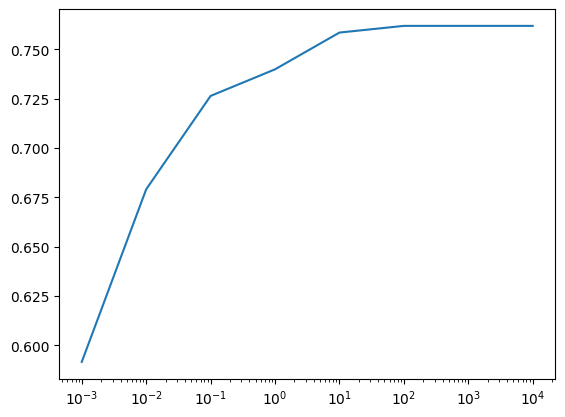

In [125]:
ax = plt.gca()
ax.plot(df['C (1/lambda)'].values,df['Validation Accuracy'].values)
ax.set_xscale('log')

In [126]:
logreg = LogisticRegression(C=10, penalty='l1', max_iter=1000, solver='liblinear')
logreg.fit(X_train, y_train)
logreg_score = logreg.score(X_test, y_test)
print(score)
Model_intercept = pd.DataFrame({"Variables": 'Intercept', "Coefficients": logreg.intercept_[0]}, index=[0])
Model_coefficients = pd.DataFrame({"Variables": X.columns, "Coefficients": np.transpose(logreg.coef_[0])})
Model_coefficients = pd.concat([Model_intercept, Model_coefficients]).reset_index(drop=True)
print(Model_coefficients)

0.7297297297297297
                          Variables  Coefficients
0                         Intercept     -1.726798
1                  Health Diaseases      2.529377
2         Child Birth and Pregnancy      0.112649
3                  External Factors      2.768949
4                  Light Conditions      0.352350
5                  Month of absence      0.262441
6                   Day of the week     -0.224652
7                           Seasons     -0.408826
8            Transportation expense      0.732336
9   Distance from Residence to Work     -0.257560
10                     Service time     -0.227985
11                              Age     -0.187387
12           Work load Average/day       0.096789
13                       Hit target     -0.029964
14             Disciplinary failure     -5.761772
15                        Education      0.322619
16                              Son      0.455809
17                   Social drinker      0.865335
18                    Social sm

# Random Forest Classifier

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [128]:
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [1,2,3,4,5,6,7,8]
# create grid
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }


# Grid search of parameters
clf_grid = GridSearchCV(estimator = clf, param_grid = params,
                                cv = 5, verbose=2, scoring='accuracy',n_jobs = -1)
# Fit the model
clf_grid.fit(X_train, y_train)
# print results
print(clf_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ...................max_features=1, n_estimators=100; total time=   0.1s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.1s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.1s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.1s
[CV] END ...................max_features=1, n_estimators=100; total time=   0.1s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.3s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.3s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.3s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.3s
[CV] END ...................max_features=1, n_estimators=200; total time=   0.3s
[CV] END ...................max_features=1, n_estimators=300; total time=   0.5s
[CV] END ...................max_features=1, n_e

In [129]:
from sklearn.metrics import accuracy_score

clf=RandomForestClassifier(random_state=0,n_estimators=400,max_features=3,oob_score=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

rfc_score = accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.722972972972973


# Conclusion

In [131]:
print("Linear Regression:", linreg_score)
print("Logistic Regression:", logreg_score)
print("Random Forest Classifier:", rfc_score )

Linear Regression: 0.20944187477843668
Logistic Regression: 0.7297297297297297
Random Forest Classifier: 0.722972972972973


According to results, linear regression is not good for choosen data. Logistic Regression and Random Forest Classifier are good for modeling the Absenteesim at work data. They almost gave same result.